In [51]:
from sklearn import tree
import pandas as pd

# 1. THE DATASET
# CPU (%), Latency (ms), Is_Work_Hours (1=Yes, 0=No)
# Target: 1 (Scale Up), 0 (Maintain)
it_data = {
    'CPU_Usage': [40, 95, 80, 50, 90, 30, 85, 20],
    'Latency':   [100, 450, 300, 120, 500, 80, 250, 90],
    'Work_Hours': [1, 1, 1, 0, 1, 0, 0, 0],
    'Action':     [0, 1, 1, 0, 1, 0, 1, 0] 
}

df = pd.DataFrame(it_data)
X = df[['CPU_Usage', 'Latency', 'Work_Hours']]
y = df['Action']

# 2. MODELING (Identifying the Best Question & Thresholds)
# max_depth=2 keeps the tree simple and efficient
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
clf = clf.fit(X, y)

# 3. TEST SCENARIO
# Current Status: 82% CPU, 310ms Latency, Not Work Hours (0)
current_status = [[30,310, 1]]
decision = clf.predict(current_status)

print(f"Decision: {'SCALE UP' if decision[0] == 1 else 'MAINTAIN'}")
print(decision)

Decision: MAINTAIN
[0]


d:\Training\.venv-mat\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [53]:
security_data = {
    'Packet_Size': [5, 500, 450, 10, 600, 8, 12, 550],
    'Known_IP':    [1, 0, 0, 1, 0, 1, 1, 1],
    'Label':       [0, 1, 1, 0, 1, 0, 0, 1] 
}

In [54]:
df = pd.DataFrame(security_data)
X = df[['Packet_Size', 'Known_IP']]
y = df['Label']

In [55]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')


In [56]:
clf_gini.fit(X, y)
clf_entropy.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
print(f"Gini-based Decision Tree Depth: {clf_gini.get_depth()}")
print(f"Entropy-based Decision Tree Depth: {clf_entropy.get_depth()}")

Gini-based Decision Tree Depth: 1
Entropy-based Decision Tree Depth: 1


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [59]:
df= pd.read_csv("student_exam_pass_dataset.csv")

In [60]:
X = df.drop(columns=['passed'])
y = df['passed']

In [61]:
num_cols = X.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = ['previous_grade']
set_config(transform_output='pandas')

pre = ColumnTransformer([
    ('grade', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

In [62]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_enc_train = pre.fit_transform(X_train)
X_enc_test = pre.transform(X_test)

In [63]:
tree = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=42
).fit(X_enc_train, y_train)

print("Train accuracy:", tree.score(X_enc_train, y_train))
print("Test  accuracy:", tree.score(X_enc_test, y_test))


Train accuracy: 0.9466666666666667
Test  accuracy: 0.92


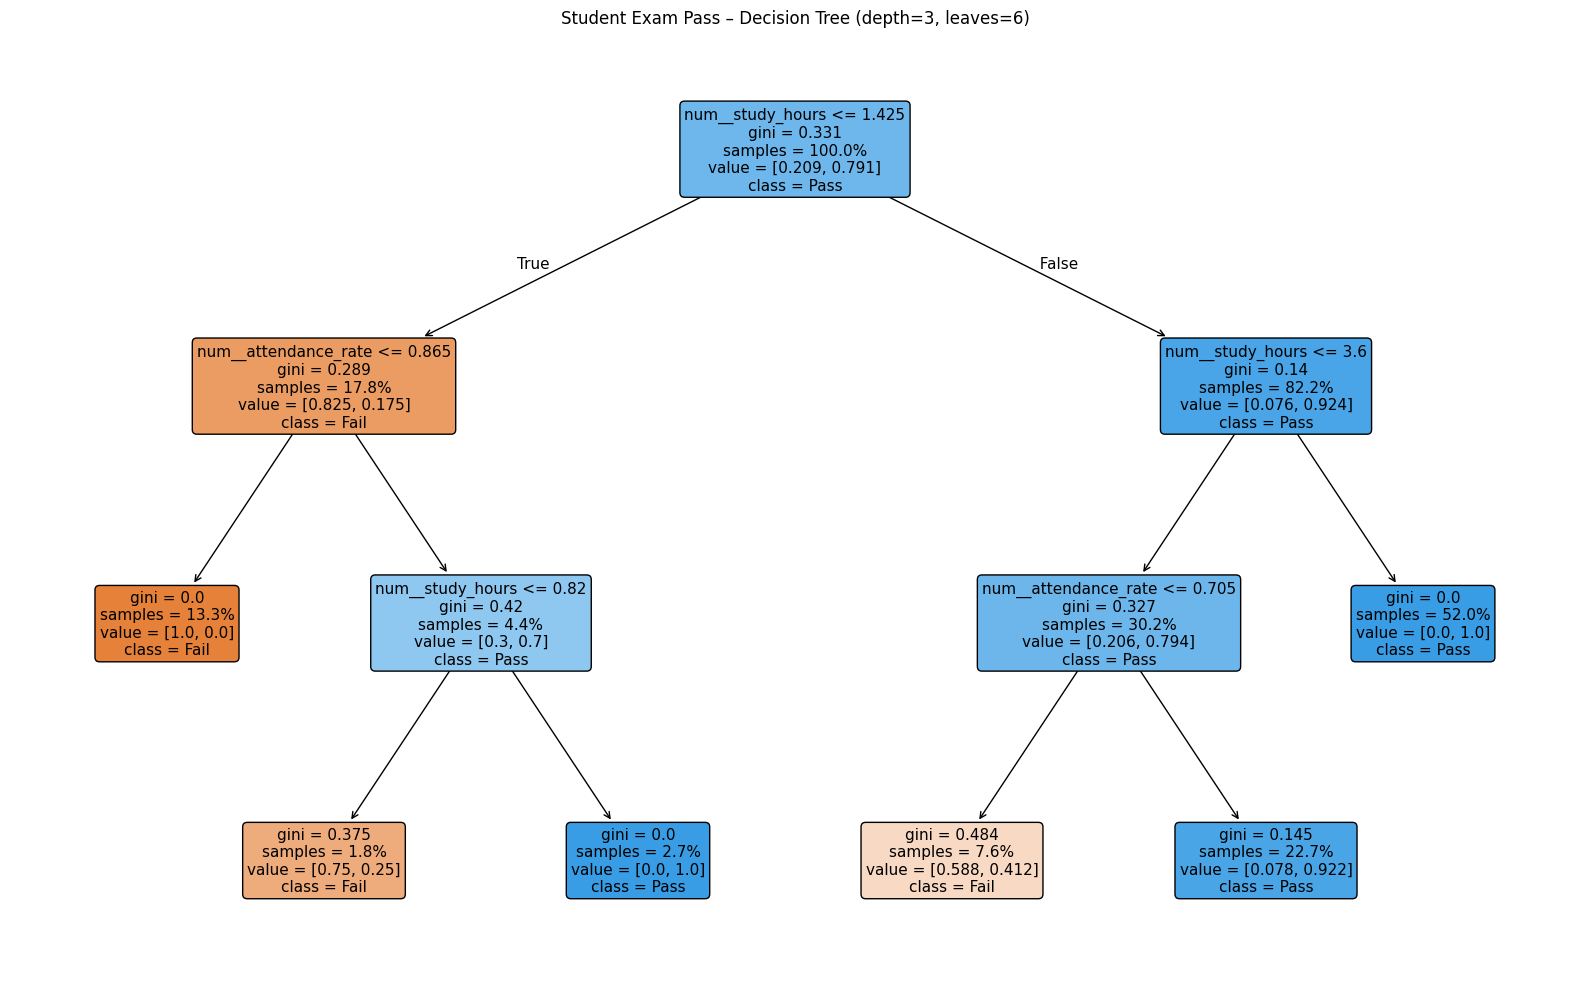

In [64]:
plt.figure(figsize=(16, 10))
plot_tree(
    tree,
    feature_names=list(X_enc_train.columns),
    class_names=['Fail','Pass'],
    filled=True, rounded=True, fontsize=11,
    impurity=True, proportion=True
)
plt.title(
    f"Student Exam Pass – Decision Tree "
    f"(depth={tree.get_depth()}, leaves={tree.get_n_leaves()})"
)
plt.tight_layout()
plt.show()